<a href="https://colab.research.google.com/github/Prashanth-557/ML-Practicals/blob/main/Fuzzy_K_Means_clustering_with_synthetic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.7 MB/s eta 0:00:00
Predicted Cluster: 1
Fuzzy Partition Coefficient (FPC): 0.9541305519507156


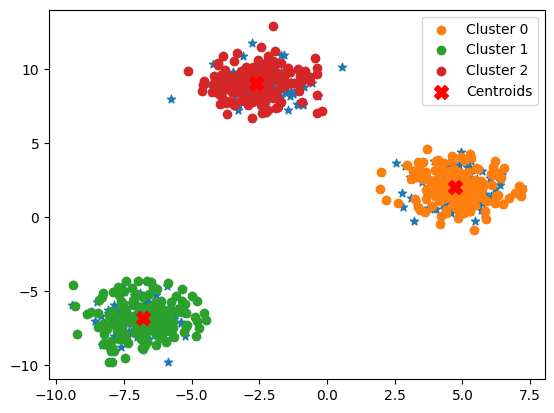

In [1]:
%pip install scikit-fuzzy

from sklearn.datasets import make_blobs
X, _ = make_blobs( n_features=2, n_samples=800, centers=3, random_state=42 )
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker="*");



from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=125)

import skfuzzy as fuzz

n_clusters = 3

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_train.T, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None
)

u_test, _, _, _, _, _ = fuzz.cluster.cmeans_predict(X_test.T, cntr, m=2.0, error=0.005, maxiter=1000)

predicted_cluster = u_test[:, 6].argmax()
print("Predicted Cluster:", predicted_cluster)

print("Fuzzy Partition Coefficient (FPC):", fpc)

for j in range(n_clusters):
    plt.scatter(X_train[u[j] > 0.5, 0], X_train[u[j] > 0.5, 1], label=f"Cluster {j}")

plt.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='X', s=100, label="Centroids")
plt.legend()
plt.show()

